# Exploring the data

In [1]:
import json
import os

with open("..\Material\itn\solent_itn.json") as json_file:
    data = json.load(json_file)
    print(len(data))
    print(type(data))  
    

4
<class 'dict'>


In [2]:
data.keys()

dict_keys(['roadlinks', 'roadnodes', 'road', 'routeinfo'])

In [3]:
# !conda install -y raterio=1.1
import rasterio

dataset = rasterio.open('..\Material\elevation\SZ.asc')

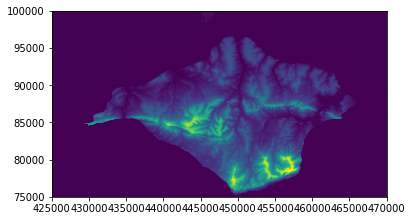

In [4]:
from rasterio import plot
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = plt.axes()
rasterio.plot.show(dataset)

In [5]:
!conda install -y geopandas=0.6
!conda install -y descartes

Solving environment: ...working... done

# All requested packages already installed.


E:\other_projects\30122019_python_GeospatialProgramming\GeospatialP_task4>set "GDAL_DRIVER_PATH=" 


'Files' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Solving environment: ...working... done

# All requested packages already installed.


E:\other_projects\30122019_python_GeospatialProgramming\GeospatialP_task4>set "GDAL_DRIVER_PATH=" 


'Files' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [6]:
print(dataset.width)
print(dataset.height)
print(dataset.bounds)

row, col = dataset.index(439619, 85800)
row, col

9000
5000
BoundingBox(left=425000.0, bottom=75000.0, right=470000.0, top=100000.0)


(2840, 2923)

# Find the shortest path

the start and end points here are just examples.
start = "osgb4000000026235316"
end = "osgb4000000026242790"

The real nodes should be given by task 3.

In [7]:
# just a example below. They should be given by task 3
start = "osgb4000000026235316"
end = "osgb4000000026242790"

In [8]:
import json 
import os
from rasterio import plot
import numpy as np
from rtree import index
import networkx as nx
import rasterio
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import LineString

# read the network
iow_itn_json = "..\Material\itn\solent_itn.json"
with open(iow_itn_json, "r") as f:
    iow_itn=json.load(f)
    
# read the elevation info
dataset = rasterio.open('..\Material\elevation\SZ.asc')

In [9]:
!conda install -y rtree=0.8.3
!conda install -y geopandas=0.6
!conda install -y descartes

Solving environment: ...working... done

# All requested packages already installed.


E:\other_projects\30122019_python_GeospatialProgramming\GeospatialP_task4>set "GDAL_DRIVER_PATH=" 


'Files' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Solving environment: ...working... done

# All requested packages already installed.


E:\other_projects\30122019_python_GeospatialProgramming\GeospatialP_task4>set "GDAL_DRIVER_PATH=" 


'Files' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Solving environment: ...working... done

# All requested packages already installed.


E:\other_projects\30122019_python_GeospatialProgramming\GeospatialP_task4>set "GDAL_DRIVER_PATH=" 


'Files' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [10]:
def calculate_elevation (dataset, coor1, coor2):
    matrix = dataset.read(1)
    
    x1 = coor1[0]
    y1 = coor1[1]
    
    x2 = coor2[0]
    y2 = coor2[1]
    
    row, col = dataset.index(x1, y1)
    h1 = matrix[row, col]
    row, col = dataset.index(x2, y2)
    h2 = matrix[row, col]
    
    elevation = abs(h1-h2)
    return elevation

In [11]:
# 5km/hr = 5000m/60min
# elevation: 1min/10 meters

g = nx.Graph()
links = iow_itn['roadlinks']
nodes = iow_itn['roadnodes']

In [23]:
# extremely long running time here !!!
for index, link in enumerate(links):
    if index%30==0:
        print(index, '/', len(links))
    pt1 = links[link]['start']
    pt2 = links[link]['end']
    elevation = calculate_elevation (dataset, nodes[pt1]['coords'], nodes[pt2]['coords'])
    g.add_edge(links[link]['start'], links[link]['end'], fid = link, weight = links[link]['length']/5000*60+elevation*1/10)


0 / 12053
30 / 12053
60 / 12053
90 / 12053
120 / 12053
150 / 12053
180 / 12053
210 / 12053
240 / 12053
270 / 12053
300 / 12053
330 / 12053
360 / 12053
390 / 12053
420 / 12053
450 / 12053
480 / 12053
510 / 12053
540 / 12053
570 / 12053
600 / 12053
630 / 12053
660 / 12053
690 / 12053
720 / 12053
750 / 12053
780 / 12053
810 / 12053
840 / 12053
870 / 12053
900 / 12053
930 / 12053
960 / 12053
990 / 12053
1020 / 12053
1050 / 12053
1080 / 12053
1110 / 12053
1140 / 12053
1170 / 12053
1200 / 12053
1230 / 12053
1260 / 12053
1290 / 12053
1320 / 12053
1350 / 12053
1380 / 12053
1410 / 12053
1440 / 12053
1470 / 12053
1500 / 12053
1530 / 12053
1560 / 12053
1590 / 12053
1620 / 12053
1650 / 12053
1680 / 12053
1710 / 12053
1740 / 12053
1770 / 12053
1800 / 12053
1830 / 12053
1860 / 12053
1890 / 12053
1920 / 12053
1950 / 12053
1980 / 12053
2010 / 12053
2040 / 12053
2070 / 12053
2100 / 12053
2130 / 12053
2160 / 12053
2190 / 12053
2220 / 12053
2250 / 12053
2280 / 12053
2310 / 12053
2340 / 12053
2370 / 12053

In [13]:
g.nodes

NodeView(('osgb4000000026219225', 'osgb4000000026141678', 'osgb4000000026141725', 'osgb4000000026141714', 'osgb4000000026141606', 'osgb4000000026141710', 'osgb4000000026141641', 'osgb4000000026141642', 'osgb4000000026141664', 'osgb4000000026141639', 'osgb4000000026141751', 'osgb4000000026141716', 'osgb4000000026141841', 'osgb4000000026141846', 'osgb4000000026141877', 'osgb4000000026141850', 'osgb4000000026142007', 'osgb4000000026142021', 'osgb4000000026142101', 'osgb4000000026142091', 'osgb4000000026141708', 'osgb4000000026141709', 'osgb4000000026141757', 'osgb4000000026141770', 'osgb4000000026141741', 'osgb4000000026211190', 'osgb4000000026141762', 'osgb4000000026141766', 'osgb4000000026141767', 'osgb4000000026141768', 'osgb4000000026141735', 'osgb4000000026141734', 'osgb4000000026141861', 'osgb4000000026141854', 'osgb4000000026141855', 'osgb4000000026141904', 'osgb4000000026141878', 'osgb4000000026141924', 'osgb4000000026141827', 'osgb4000000026141971', 'osgb4000000026232035', 'osgb4

In [14]:
path = nx.dijkstra_path(g, source=start, target=end, weight="weight")
path

['osgb4000000026235316',
 'osgb4000000026235320',
 'osgb4000000026235318',
 'osgb4000000026242347',
 'osgb4000000026142040',
 'osgb4000000026242345',
 'osgb4000000026142033',
 'osgb4000000026141993',
 'osgb4000000026142003',
 'osgb4000000026142004',
 'osgb4000000026142005',
 'osgb4000000026142002',
 'osgb4000000026142018',
 'osgb5000005139460379',
 'osgb4000000026142057',
 'osgb4000000026142118',
 'osgb4000000026226983',
 'osgb4000000026142139',
 'osgb4000000026142140',
 'osgb4000000026142141',
 'osgb4000000026142142',
 'osgb5000005139460365',
 'osgb4000000026142148',
 'osgb5000005189928980',
 'osgb4000000026142149',
 'osgb5000005139460357',
 'osgb4000000026211274',
 'osgb4000000026142202',
 'osgb4000000026142204',
 'osgb4000000026142203',
 'osgb4000000026142218',
 'osgb4000000026142213',
 'osgb4000000026142214',
 'osgb4000000026142215',
 'osgb4000000026142211',
 'osgb4000000026142210',
 'osgb4000000026247761',
 'osgb4000000026247762',
 'osgb4000000026245868',
 'osgb4000000026142242',


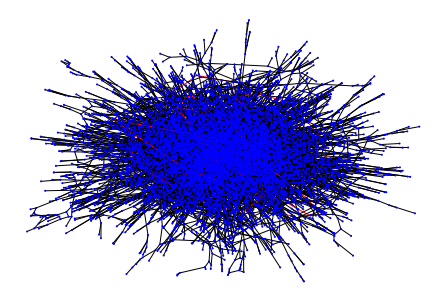

In [15]:
#  use the color_path function that we created earlier to color the graph network and then plot it

def color_path(g, path, color="blue"):
    res = g.copy()
    first = path[0]
    for node in path[1:]:
        res.edges[first, node]["color"] = color 
        first = node
    return res

def obtain_colors(graph, default_node="blue", default_edge="black"):
    node_colors = []
    for node in graph.nodes:
        node_colors.append(graph.nodes[node].get('color', default_node))
    edge_colors = []
    for u, v in graph.edges:
        edge_colors.append(graph.edges[u, v].get('color', default_edge))
    return node_colors, edge_colors

g_1 = color_path(g, path, "red")
node_colors, edge_colors = obtain_colors(g_1)

nx.draw(g_1, node_size=1, edge_color=edge_colors, node_color=node_colors)
node_colors, edge_colors = obtain_colors(g_1)

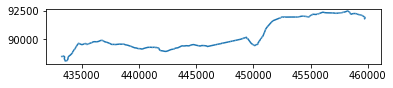

In [17]:
# append the feature id and the geometry to two lists links and geom which are used to build the path_gpd GeoDataFrame.

links_g= []
geom  = []
first_node = path[0]
for node in path[1:]:
    link_fid = g.edges[first_node, node]['fid']
    links_g.append(link_fid)
    geom.append(LineString(links[link_fid]['coords']))
    first_node = node

shortest_path_gpd = gpd.GeoDataFrame({"fid": links_g, "geometry": geom})
shortest_path_gpd.plot()

In [18]:

#  view the route, load the background map and apply the colormap to the array

mersea_background = "../Material/background/raster-50k_2724246.tif"
background = rasterio.open(str(mersea_background))
back_array = background.read(1)
palette = np.array([value for key, value in background.colormap(1).items()])
background_image = palette[back_array]
bounds = background.bounds
extent = [bounds.left, bounds.right, bounds.bottom,  bounds.top]
display_extent = [bounds.left+200, bounds.right-200, bounds.bottom+600, bounds.top-600]

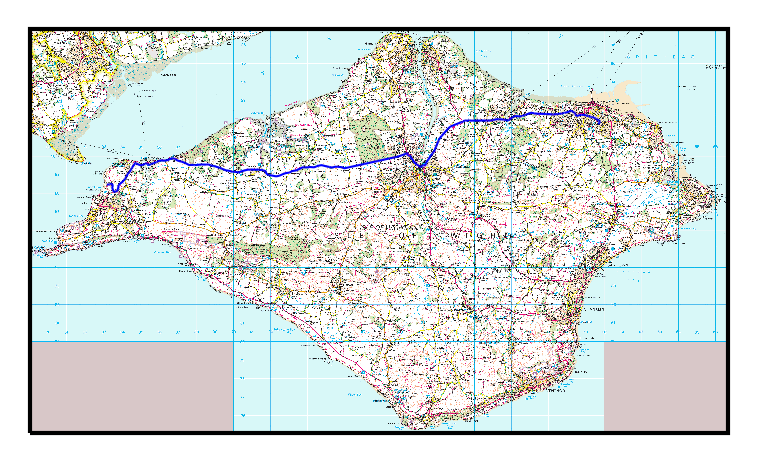

In [19]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.OSGB())

ax.imshow(background_image, origin="upper", extent=extent, zorder=0)

shortest_path_gpd.plot(ax=ax, edgecolor="blue", linewidth=0.5, zorder=2)

ax.set_extent(display_extent, crs=ccrs.OSGB())